In [38]:
import pandas as pd
import seaborn as sns
sns.set_theme(style="darkgrid")
import matplotlib.pyplot as plt
import numpy as np

In [25]:
df = pd.read_csv('full_experiments.csv', index_col=0)

In [135]:
dft = df#df.iloc[350:400]
sparseL1 = dft[(dft['m']<=50) & (dft['sparsity']==.5)]#& (dft['ncoeff']==0.1) dft['sparsity']==1.) &

In [136]:
#sns.color_palette("binary")

In [137]:
plt.rcParams['text.usetex'] = False

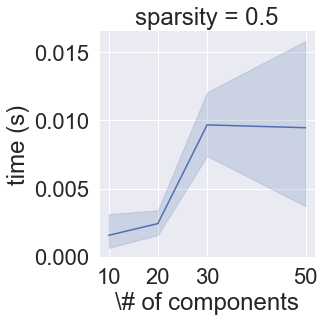

In [138]:
#df[['ncoeff', 'sparsity']].apply(tuple, axis=1)
#plt.style.use('grayscale')
#fig, ax = plt.subplots()
runs = [
    (None,"timetear",'mintear_time.png',[10,20,30,50]),
    ("ncoeff","timescc",'minscc_time.png',[10,20,30]),
    ("ncoeff","timeguess",'minassign_time.png',[10,20,30]),
]
hue,y,filename,xticks = runs[0]
sns.set(font_scale = 2)
g = sns.relplot(data=sparseL1, x="m",  y=y, col="sparsity", hue=hue, palette="colorblind", kind="line");
g = (g.set_axis_labels("\# of components","time (s)")).set(xticks=(xticks))
#g.set(yscale = 'log');
plt.savefig(filename, dpi=200)

In [44]:
sparseL1sq = sparseL1.copy()
sparseL1sq["sqtimetear"] = np.log(sparseL1sq["timetear"])

In [168]:
dfpost = df.copy()
dfpost["deltascc"] = dfpost['maxscc']-dfpost['minscc']
dfpost["dguesstear"] = dfpost['guess']-dfpost['minguess']

In [169]:
dfclean = dfpost[(dfpost["dguesstear"] >= 0)]
#dfclean = dfclean[(dfclean['sparsity']==.5)]

In [170]:
#dfclean["deltascc"].sum()

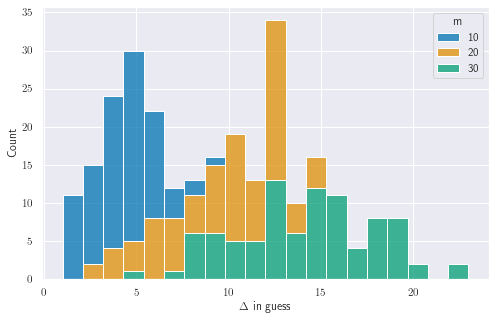

In [194]:
fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(data=dfclean, x="dguesstear", hue="m", palette="colorblind", bins=20, multiple="stack");
ax.set_xlabel(r'$\Delta$ in guess');

In [195]:
plt.savefig('guess_distribution.png', dpi=200)

<Figure size 432x288 with 0 Axes>